We will use yfinance to to load SNP500 price data.

In [1]:
# import lib
import yfinance as yf

In [2]:
# ^GSPC is ticker code for SNP500
sp500 = yf.Ticker("^GSPC")

# get data from beginning of SNP500
sp500 = sp500.history(period = 'max')

sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


We are provided with many columns:
- `Open`: Market opening price
- `High`: Highest price in that trading day
- `Low`: Lowest price in that trading day
- `Close`: Market closing price
- `Volume`: Number of shares traded in a stock, or contracts traded in futuress/options
- `Dividends`: Payment to shareholders that consists of additional shares of that stock
- `Stock Splits`: when more shares are issued to current shareholders

In [3]:
# see index of snp500 data
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-07-19 00:00:00-04:00', '2024-07-22 00:00:00-04:00',
               '2024-07-23 00:00:00-04:00', '2024-07-24 00:00:00-04:00',
               '2024-07-25 00:00:00-04:00', '2024-07-26 00:00:00-04:00',
               '2024-07-29 00:00:00-04:00', '2024-07-30 00:00:00-04:00',
               '2024-07-31 00:00:00-04:00', '2024-08-01 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24262, freq=None)

Note: Index is the date and time of the market opening

Now, time to clean and visualise the pricing of snp500

In [4]:
# Dividends and Stock Splits are more for indiv stocks, not index, so we will remove these columns
del sp500['Dividends']
del sp500['Stock Splits']

sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


In stock market, data from "ancient times" don't matter much, since market structure might have evolved or shifted fundamentally. So, we will remove rows containing data any earlier than 1990.

In [5]:
sp500 = sp500.loc['1990-01-01':]

sp500

,Open,High,Low,Close,Volume
Date,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000
...,...,...,...,...,...
2024-07-26 00:00:00-04:00,5433.669922,5488.319824,5430.700195,5459.100098,3638770000
2024-07-29 00:00:00-04:00,5476.549805,5487.740234,5444.439941,5463.540039,3379970000
2024-07-30 00:00:00-04:00,5478.729980,5489.459961,5401.700195,5436.439941,3777740000


In [6]:
# handle missing values using forward filling
sp500.fillna(method = 'ffill', inplace=True)

sp500.info()
sp500.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8712 entries, 1990-01-02 00:00:00-05:00 to 2024-08-01 00:00:00-04:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    8712 non-null   float64
 1   High    8712 non-null   float64
 2   Low     8712 non-null   float64
 3   Close   8712 non-null   float64
 4   Volume  8712 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 408.4 KB


,Open,High,Low,Close,Volume
Date,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000


#### Plots

Now, we will move on to plotting graphs to visualise the distributions.

In [7]:
# lib
import matplotlib.pyplot as plt

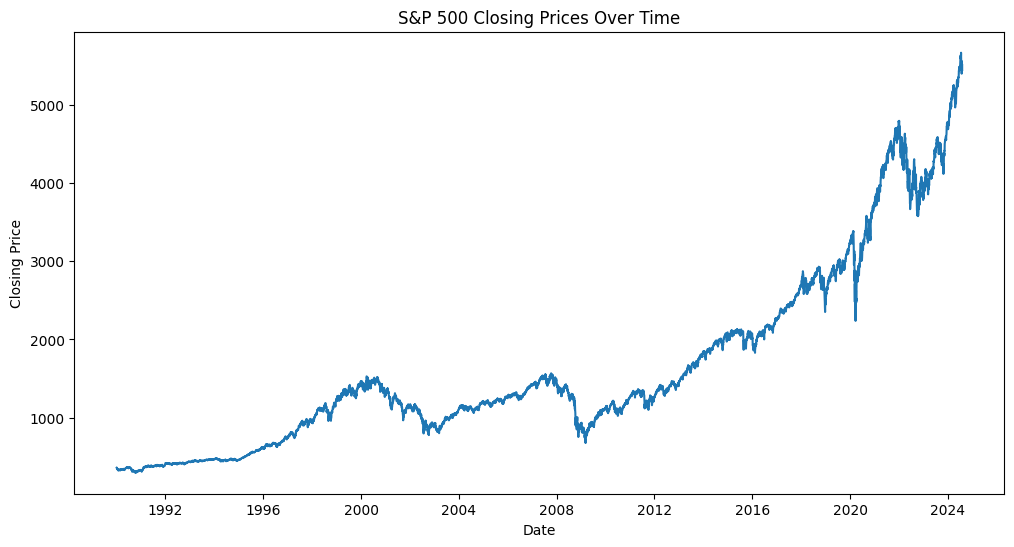

In [8]:
# Plot closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(sp500.index, sp500['Close'])
plt.title('S&P 500 Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

### Findings:

---

##### Early 1990s Stability

From 1990 to around 1995, snp500 index shows relatively stable increasing trend.

---

### ## Late 1990s Bull Market

significant increase in the index is observed from 1995 to 2000, reflecting the dot-com bubble period where tech stocks soared.

---

##### Dot-com bubble burst

In 2000, index peaks and then sharply drops, marking the burst of the dot-com bubble. This trend continues till around 2002-2003.

---

##### Mid-2000s recovery and financial crisis

from 2003 to 2007, index recovers and reaches new highs. However, this is followed by a stepp decline in 2008-2009 due to global financial crisis.

---

##### Post-2009 bull market

starting 2009, snp500 embarks on a long-term upward trend, driven by economic recovery and growth, quantitative easing, and technological advancements.

---

##### COVID-19 pandemic

In early 2020, sharp but brief dip is observed, corresponding to the onset of COVID-19 pandemic, however, market quickly recovers and continues to rise.

---

##### Recent Trends:

from 2020 onwards, index shows steep upward trajectory, reaching new all-time highs by 2024. This reflects post-pandemic recovery, government stimululs and more economic activity.

### Analysis

1. Market Cycles: plot clearly shows the cyclical nature of stock market with periods of bull and bear markets.
2. Economic Events: major economic events and crises have huge impact on snp500 index, causing significant fluctuations.
3. long-term growth: Despite periodic drops, overall longterm trend of snp500 is upward, showing sustained economic growth and increasing corporate profitability over time.
4. Investment Impliciations: Investors can see that although short-term market movements can be volatile, holding invesmtnets over long term has historically resulted in positive returns.
5. Risk and Volatility: the plot highlights the importance of understanding market volatility and risks associated with short-term investments. Significant downturns can occur, but market has shown resilience anmmd recovery over long term.

---

### Conclusion

snp500 closing prices over time provide valuable insights into market behaviour, economic cycles and long-term growth trends. Analysing such a plot helps investors understand the broader market context, identify periods of risk and opportunity, and make informed investment decisions based on historical performance.

<Figure size 1200x600 with 0 Axes>

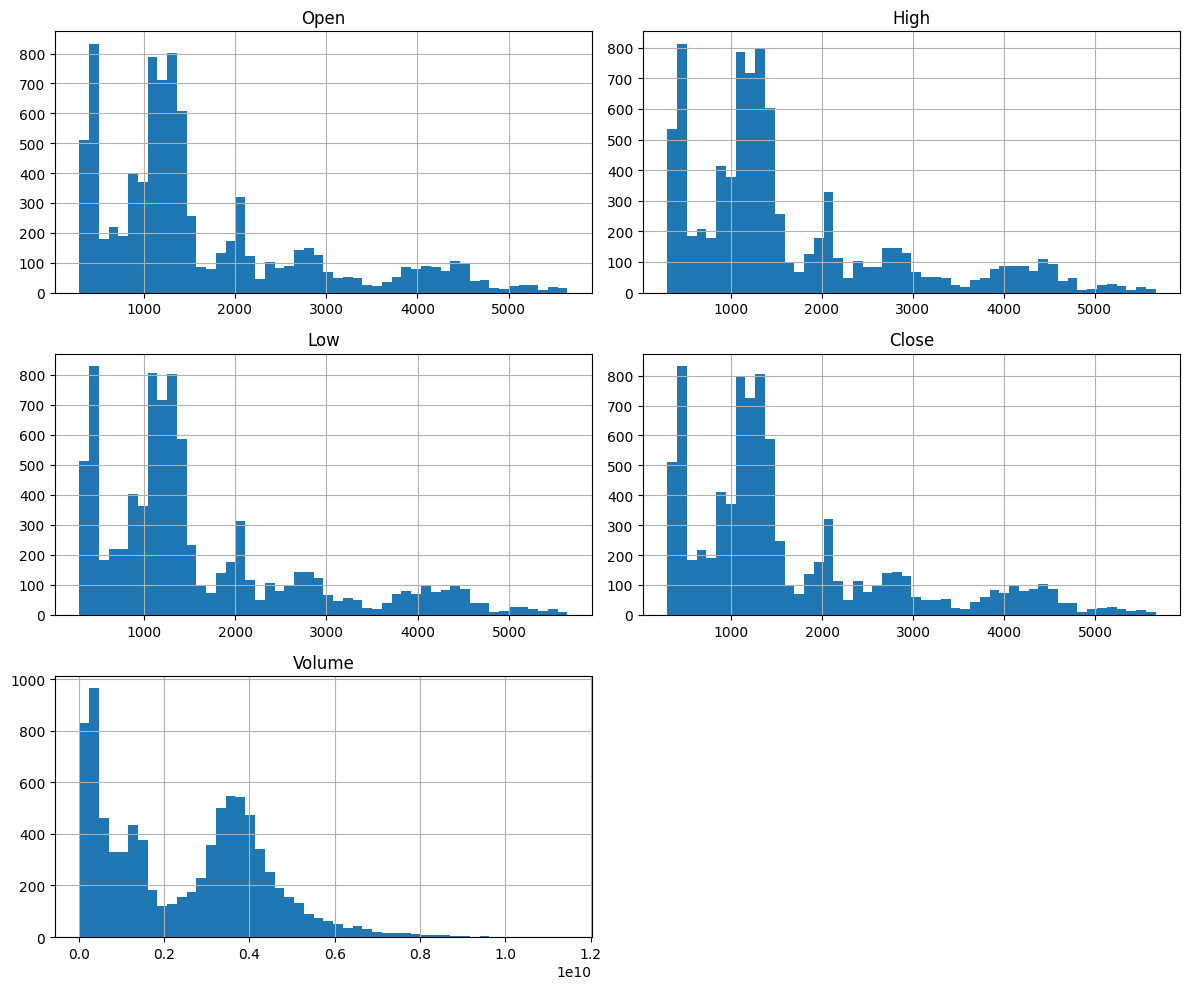

In [9]:
# visualize distribution of key features

plt.figure(figsize=(12, 6))
sp500[['Open', 'High', 'Low', 'Close', 'Volume']].hist(bins=50, figsize=(12, 10))
plt.tight_layout()
plt.show()

## Findings

---

#### `Open`, `High`, `Low`, `Close` Prices
- Bimodal distribution across all, with 2 distinct peaks.
- First peak: around 500-1500 range. This indicates that a significant number of trading days had prices within this range.
- Second peak: less pronounced and appears around 2000-3500 range. Represents the more recent years where the index values have been higher.
- Tail: Long tail extending towards the right, indicating that while most trading days had prices in the lower range, there are notable instances of much higher prices.

---

#### `Volume`
- Right skewed: most trading days have lower trading volumes, and a few days show exceptionally high volumes.
- Concentration: majority of trading volumes are concentrated below `0.2e10`, with a gradual decline as volume increases.

## Detailed Analysis

---

#### Historical Price Ranges
- Bimodal distribution suggests different eras in the snp500's history. Lower peak likely corresponds to earlier part of the data set (1990 to early 2000s), while higher peak corresponds to more recent years.
- Presence of 2 distinct peaks reflects significant growth in the index over the years, with newer highs being reached in the more recent times.

---

#### Market Dynamics
- Wide range of prices indicates substantial growth and volatility in the market. The snp500 has seen considerable fluctuations, but overall trend has been upwards, as observed in the closing prices plot.
- Increase in trading volume over time can be attributed to greater market participation, technological advancements in trading, and increased interest in financial markets.

---

#### Investment Insights
- Bimodal nature of price distributions underscores the importance of understanding historical market phases for long-term investment strategies.
- Right-skewed volume distribution highlights importance of liquidity in the market. Higher volumes often correspond to significant market events, which can provide opportunities for short-term trading or inform long-term investment decisions.

### Conclusion

Distributions of the key features in the snp500 dataset reveal important insights into the historical behavior of the market. The data shows substantial growth in index prices over the years, marked by significant volatility and periods of high trading volumes. Understanding these distributions can help investors recognize historical trends, evaluate market dynamics, and make informed deicions based on historical patterns and market behavior.

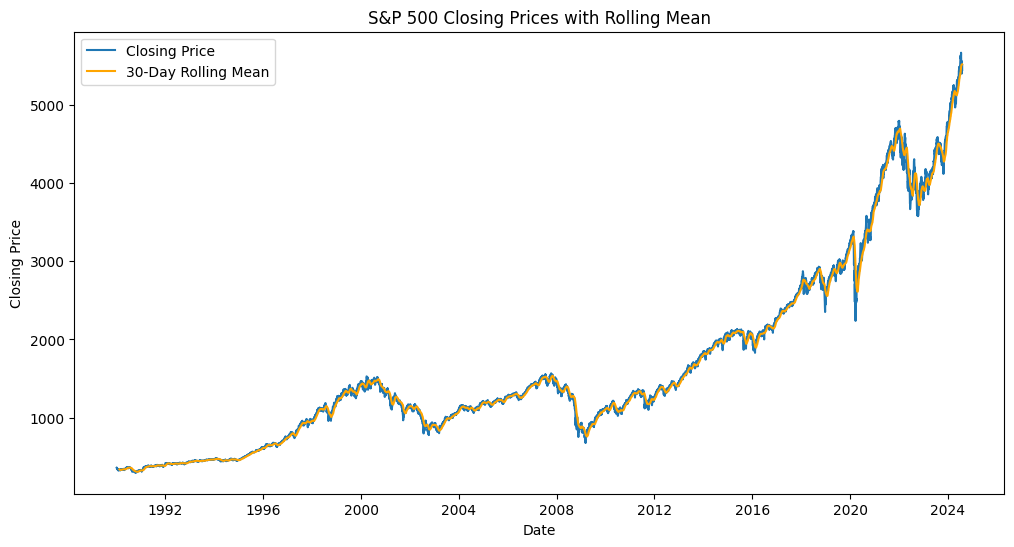

In [10]:
# Create a rolling mean
sp500['Rolling_Mean'] = sp500['Close'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(sp500.index, sp500['Close'], label='Closing Price')
plt.plot(sp500.index, sp500['Rolling_Mean'], label='30-Day Rolling Mean', color='orange')
plt.title('S&P 500 Closing Prices with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## Findings

---

#### Overall upward trend
- snp500 has shown consistent upward trend over long term. Despite periodic declines, index continued to reach new highs, reflecting overall economic growth and increasing corporate earnings.

---

#### Periods of Volatility
- Dot-com Bubble (2000-2002): significant rise followed by sharp decline representing boom and bust of tech sector.
- Global Financial Crisis (2008-2009): steep decline in index, reflecting severe economic downturn during period.
- COVID-19 Pandemic (2020): rapid drop follwoed by swift recovery, indicating market's initial panic and subsequent confidence in economic recovery measures.

---

#### Rolling Mean Smoothing
- 30-day rolling mean (orange line) closely follows actual closing prices (blue line) but smooths out some of the short-term noise.
- Rolling mean provides clearer picture of the underlying trend by reducing the impact of daily volatility.

---

#### Short-term Fluctuations
- Plot shows numerous short-term fluctuations around general trend. These fluctuations are smoothed out by the rolling mean, which helps to highlight the longer-term trend more effectively.

---

#### Market Recoveries
- Post-crisis recoveries are evident, with rolling mean capturing gradual uptrend following significant downturns. For example, recovery after dot-com bubble, financial crisis, and COVID-19 pandemic.

## Conclusion

The plot of S&P 500 closing prices with the 30-day rolling mean provides valuable insights into the long-term trends and stability of the index. The rolling mean effectively smooths out short-term fluctuations, revealing the underlying growth trend. Despite periodic downturns due to economic crises, the S&P 500 has demonstrated resilience and continued growth, reaffirming its status as a stable investment option. This analysis underscores the importance of long-term investing and the usefulness of tools like the rolling mean in understanding market trends.

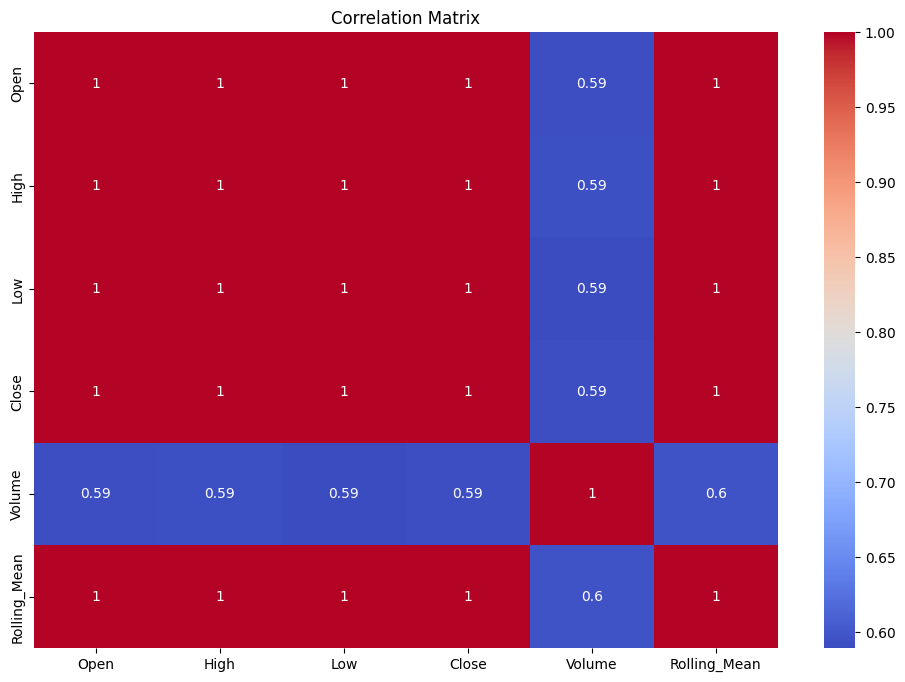

In [11]:
# Correlation matrix
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(sp500.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Analysis of Correlation Matrix

The correlation matrix heatmap displays the correlation coefficients between different features of the S&P 500 dataset, including `Open`, `High`, `Low`, `Close`, `Volume`, and `Rolling_Mean`. The correlation coefficient ranges from -1 to 1, where:

- 1 indicates a perfect positive correlation.
- -1 indicates a perfect negative correlation.
- 0 indicates no correlation.

---

### Key Observations

#### Perfect Correlation Among `Open`, `High`, `Low`, `Close`, and `Rolling_Mean`:

- The features Open, High, Low, Close, and Rolling_Mean exhibit perfect positive correlations (correlation coefficient of 1) with each other.
- This indicates that these features move together perfectly, meaning when one increases, the others increase proportionally. This is expected as they are all derived from the same daily stock price data and are intrinsically linked.

#### Moderate Positive Correlation Between Volume and Other Features:

- The Volume feature shows a moderate positive correlation (correlation coefficient of 0.59) with `Open`, `High`, `Low`, `Close`.
- A correlation coefficient of 0.59 suggests that there is a moderate positive relationship between the trading volume and the stock prices, meaning that higher volumes tend to be associated with higher prices, but the relationship is not as strong as among the price features themselves.

#### Slightly Higher Correlation Between Volume and Rolling_Mean:

- The correlation between `Volume` and `Rolling_Mean` is slightly higher at 0.60, which indicates that the 30-day rolling mean of the closing prices has a slightly stronger relationship with the trading volume compared to the individual daily prices.
- This could be because the rolling mean smooths out short-term fluctuations, capturing longer-term trends that might be more reflective of sustained trading interest and volume.

---

### Detailed Analysis

#### Price Feature Interdependence:

- The perfect correlations among `Open`, `High`, `Low`, `Close`, and `Rolling_Mean` indicate that these metrics are all strongly interdependent. This is typical for stock data where the opening, highest, lowest, and closing prices of a day are closely related. The rolling mean, being a smoothed version of the closing prices, also naturally shows a perfect correlation with the individual price features.

#### Volume as an Indicator:

- The moderate correlation of `Volume` with the price features suggests that while trading volume does influence stock prices, it is not the sole factor. Other factors like market sentiment, economic indicators, and news events also play significant roles in determining stock prices.
- The slightly higher correlation of Volume with the `Rolling_Mean` could imply that average price trends over a longer period are more closely associated with trading volumes, possibly reflecting broader market trends and investor behavior.

#### Implications for Analysis and Modeling:

- The high correlations among price-related features mean that they carry redundant information for modeling purposes. This could lead to multicollinearity in regression models, where independent variables are highly correlated.
- When modeling stock prices, it might be useful to focus on features that capture different aspects of the market, such as trading volume, volatility indicators, or external economic factors, rather than multiple price-related features that are closely interlinked.

---

### Conclusion

The correlation matrix provides a clear picture of the relationships between different features in the S&P 500 dataset. The perfect correlations among price features highlight their interdependence, while the moderate correlation of `Volume` with these features indicates its influence on price movements. Understanding these correlations is crucial for effective modeling and analysis of stock market data. When building predictive models, it is important to consider the potential for multicollinearity and focus on diverse features that capture different market dynamics.

### Setting up Target Variable

*Problem*: we can very accurately predict the absolute price but we can still lose a lot of money because if we are buying and selling stocks, we don't care about getting an accurate price, but rather the direction (whether it will go up or down).

Target: will stock go up/down tomorrow at closing

In [12]:
# create column for target, assign value to next day's close
sp500['Tomorrow'] = sp500['Close'].shift(-1)

# create column for Target: bool (1 for tomorrow higher than today, 0 for tomorrow lower than today)
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)

sp500

,Open,High,Low,Close,Volume,Rolling_Mean,Tomorrow,Target
Date,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,NaN,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,NaN,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,NaN,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,NaN,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,NaN,349.619995,0
...,...,...,...,...,...,...,...,...
2024-07-26 00:00:00-04:00,5433.669922,5488.319824,5430.700195,5459.100098,3638770000,5517.187695,5463.540039,1
2024-07-29 00:00:00-04:00,5476.549805,5487.740234,5444.439941,5463.540039,3379970000,5518.181022,5436.439941,0
2024-07-30 00:00:00-04:00,5478.729980,5489.459961,5401.700195,5436.439941,3777740000,5518.342350,5522.299805,1


## Feature Engineering

For feature engineering, there are many things we could do but I have narrowed done to my preferred few, namely volatility measures and lagged features.

####  Volatility Measures:
- `Daily_Return`: daily percentage change in closing prices. Daily returns are a fundamental measure of volatility. This helps to understand how much the stock price fluctuates on a daily basis. Furthermore, this can be used for risk assessment, track performance of snp500 over time to compare with other indices, and to calculate other important metrics such as annualised return and Sharpe ratio.
- `Rolling_Std`: Rolling Standard Deviation measures the volatility of a stock over a specific rolling window, in my case, 30 days. Provides a dynamic view of volatility, showing how it changes over time, helps in identifying periods of high and low volatility, which can be associated with different market conditions or events, and to be used as a signal for entry and exit points.

#### Lagged Prices:
- `Lag_1`, `Lag_2`, `Lag_3`: Closing prices from previous dayys, shifted by specific number of days. Stock prices often exhibit autocorrelation, where past prices can be predictive of future prices. Including lagged prices can capture this relationship. Also help identify trends and patterns over short periods, and provide additional input features for models to learn from past behaviour and improve predictions.
- `Lag_Return_1`, `Lag_Return_2`, `Lag_Return_3`: Daily returns from previous days shifted back. Can capture momentum effects, where past returns influence future returns, help identify mean reversion patterns, where extreme returns are followed by opposite movements, and help models to learn from past return patterns and enhance prediction accuracy.

In [13]:
# Calculate Daily Return
sp500['Daily_Return'] = sp500['Close'].pct_change()

# Calculate Rolling Standard Deviation (30 days)
sp500['Rolling_Std'] = sp500['Close'].rolling(window=30).std()

# Drop rows with NaN values (caused by rolling calculations)
sp500.dropna(inplace=True)

sp500

,Open,High,Low,Close,Volume,Rolling_Mean,Tomorrow,Target,Daily_Return,Rolling_Std
Date,,,,,,,,,,
1990-02-12 00:00:00-05:00,333.619995,333.619995,329.970001,330.079987,118390000,337.700334,331.019989,1,-0.010611,10.659240
1990-02-13 00:00:00-05:00,330.079987,331.609985,327.920013,331.019989,144490000,336.744667,332.010010,1,0.002848,9.876208
1990-02-14 00:00:00-05:00,331.019989,333.200012,330.640015,332.010010,138530000,335.853000,334.890015,1,0.002991,8.987605
1990-02-15 00:00:00-05:00,332.010010,335.209991,331.609985,334.890015,174620000,335.160333,332.720001,0,0.008674,8.171342
1990-02-16 00:00:00-05:00,334.890015,335.640015,332.420013,332.720001,166840000,334.511000,327.989990,0,-0.006480,7.518505
...,...,...,...,...,...,...,...,...,...,...
2024-07-25 00:00:00-04:00,5428.700195,5491.589844,5390.950195,5399.220215,4592120000,5515.918685,5459.100098,1,-0.005143,72.031911
2024-07-26 00:00:00-04:00,5433.669922,5488.319824,5430.700195,5459.100098,3638770000,5517.187695,5463.540039,1,0.011090,70.624169
2024-07-29 00:00:00-04:00,5476.549805,5487.740234,5444.439941,5463.540039,3379970000,5518.181022,5436.439941,0,0.000813,69.612330


In [14]:
# Calculate Lagged Prices (1, 2, 3 days)
sp500['Lag_1'] = sp500['Close'].shift(1)
sp500['Lag_2'] = sp500['Close'].shift(2)
sp500['Lag_3'] = sp500['Close'].shift(3)

# Calculate Lagged Returns (1, 2, 3 days)
sp500['Lag_Return_1'] = sp500['Daily_Return'].shift(1)
sp500['Lag_Return_2'] = sp500['Daily_Return'].shift(2)
sp500['Lag_Return_3'] = sp500['Daily_Return'].shift(3)

# Drop rows with NaN values (caused by shifting)
sp500.dropna(inplace=True)

sp500

,Open,High,Low,Close,Volume,Rolling_Mean,Tomorrow,Target,Daily_Return,Rolling_Std,Lag_1,Lag_2,Lag_3,Lag_Return_1,Lag_Return_2,Lag_Return_3
Date,,,,,,,,,,,,,,,,
1990-02-15 00:00:00-05:00,332.010010,335.209991,331.609985,334.890015,174620000,335.160333,332.720001,0,0.008674,8.171342,332.010010,331.019989,330.079987,0.002991,0.002848,-0.010611
1990-02-16 00:00:00-05:00,334.890015,335.640015,332.420013,332.720001,166840000,334.511000,327.989990,0,-0.006480,7.518505,334.890015,332.010010,331.019989,0.008674,0.002991,0.002848
1990-02-20 00:00:00-05:00,332.720001,332.720001,326.260010,327.989990,147300000,333.650999,327.670013,0,-0.014216,6.664277,332.720001,334.890015,332.010010,-0.006480,0.008674,0.002991
1990-02-21 00:00:00-05:00,327.910004,328.170013,324.470001,327.670013,159240000,332.919333,325.700012,0,-0.000976,6.024857,327.989990,332.720001,334.890015,-0.014216,-0.006480,0.008674
1990-02-22 00:00:00-05:00,327.670013,330.980011,325.700012,325.700012,184320000,332.199000,324.149994,0,-0.006012,5.515274,327.670013,327.989990,332.720001,-0.000976,-0.014216,-0.006480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-25 00:00:00-04:00,5428.700195,5491.589844,5390.950195,5399.220215,4592120000,5515.918685,5459.100098,1,-0.005143,72.031911,5427.129883,5555.740234,5564.410156,-0.023149,-0.001558,0.010792
2024-07-26 00:00:00-04:00,5433.669922,5488.319824,5430.700195,5459.100098,3638770000,5517.187695,5463.540039,1,0.011090,70.624169,5399.220215,5427.129883,5555.740234,-0.005143,-0.023149,-0.001558
2024-07-29 00:00:00-04:00,5476.549805,5487.740234,5444.439941,5463.540039,3379970000,5518.181022,5436.439941,0,0.000813,69.612330,5459.100098,5399.220215,5427.129883,0.011090,-0.005143,-0.023149


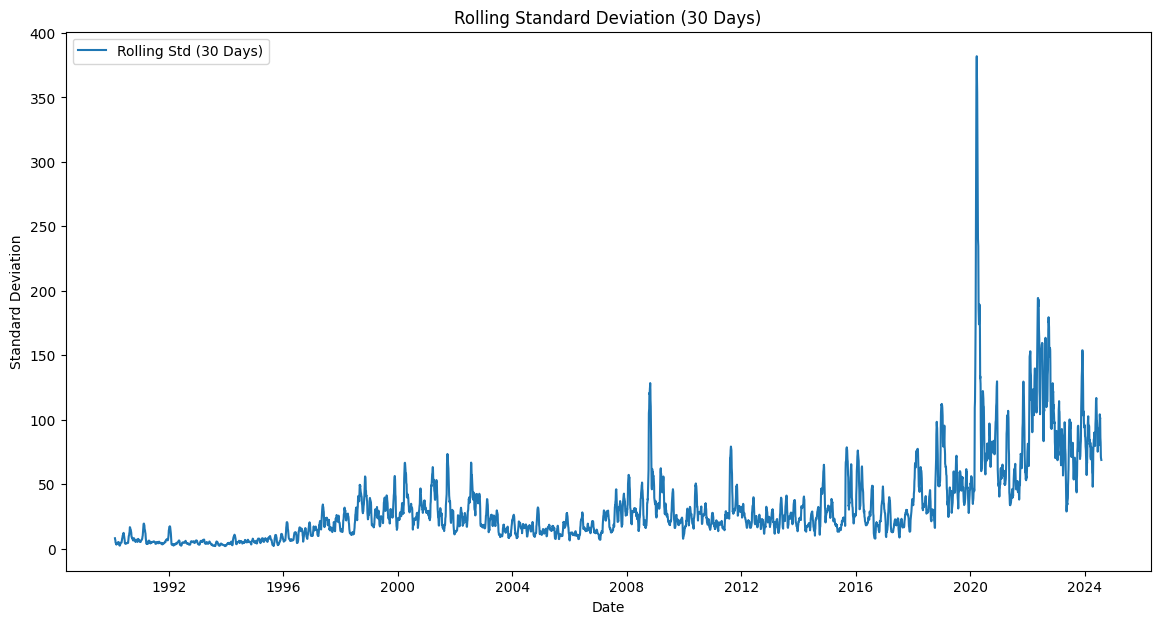

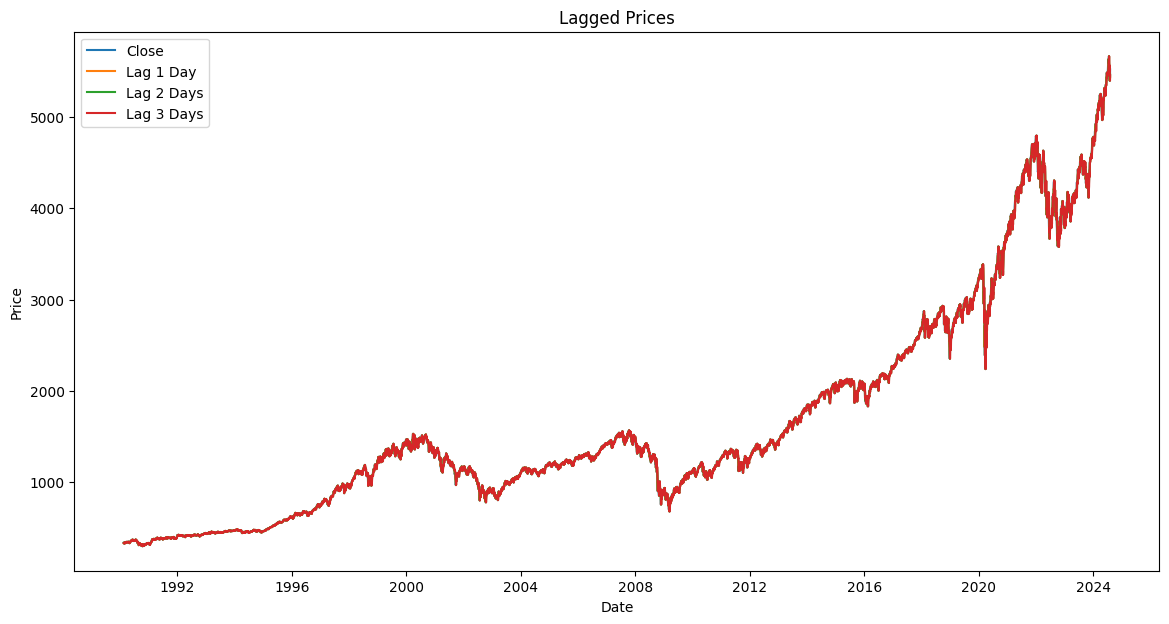

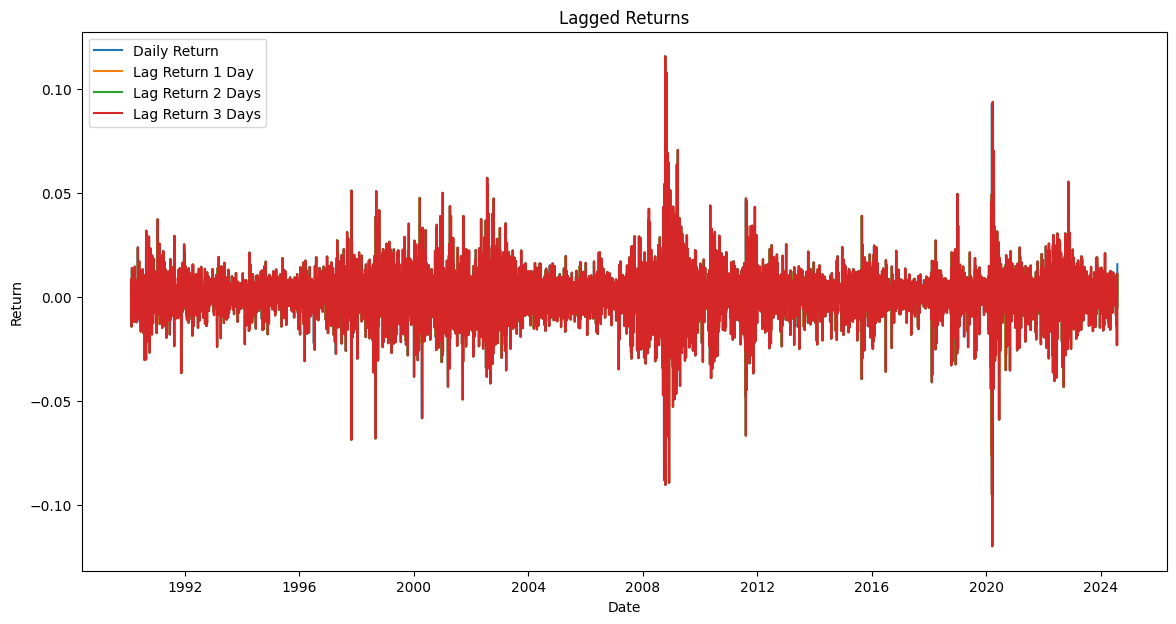

In [15]:
# Plot rolling standard deviation
plt.figure(figsize=(14, 7))
plt.plot(sp500.index, sp500['Rolling_Std'], label='Rolling Std (30 Days)')
plt.title('Rolling Standard Deviation (30 Days)')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()

# Plot lagged prices
plt.figure(figsize=(14, 7))
plt.plot(sp500.index, sp500['Close'], label='Close')
plt.plot(sp500.index, sp500['Lag_1'], label='Lag 1 Day')
plt.plot(sp500.index, sp500['Lag_2'], label='Lag 2 Days')
plt.plot(sp500.index, sp500['Lag_3'], label='Lag 3 Days')
plt.title('Lagged Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(sp500.index, sp500['Daily_Return'], label='Daily Return')
plt.plot(sp500.index, sp500['Lag_Return_1'], label='Lag Return 1 Day')
plt.plot(sp500.index, sp500['Lag_Return_2'], label='Lag Return 2 Days')
plt.plot(sp500.index, sp500['Lag_Return_3'], label='Lag Return 3 Days')
plt.title('Lagged Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

## Analysis of the New Feature Visualizations

### 1. Rolling Standard Deviation (30 Days)

**Key Observations**:
- **Increasing Volatility**: The plot shows periods of increased volatility, with notable spikes around the 2000 dot-com bubble, the 2008 financial crisis, and the 2020 COVID-19 pandemic.
- **Stable Periods**: There are long periods of relatively low volatility, particularly during the 1990s and the early 2010s.
- **Highest Spike**: The most significant spike in volatility occurred in 2020, likely due to the market's reaction to the COVID-19 pandemic.

**Conclusion**:
- The rolling standard deviation highlights significant market events and periods of high uncertainty. It is a crucial feature for understanding market risk and can help identify times when the market is more unpredictable.

### 2. Lagged Prices (1-3 Days)

**Key Observations**:
- **Consistent Trends**: The lagged prices closely follow the actual closing prices with a slight shift due to the lag.
- **Parallel Movements**: All the lagged prices (1 day, 2 days, and 3 days) move in parallel with the actual closing prices, indicating strong autocorrelation.
- **Capturing Trends**: These lagged features capture the short-term trends effectively.

**Conclusion**:
- Lagged prices provide valuable information on the autocorrelation in stock prices, which is useful for predictive modeling. The consistent trends observed in the lagged prices suggest that past prices can be strong predictors of future prices.

### 3. Lagged Returns (1-3 Days)

**Key Observations**:
- **High Volatility Periods**: The plot shows increased return volatility during significant market events, such as the 2000 dot-com bubble, the 2008 financial crisis, and the 2020 COVID-19 pandemic.
- **Mean Reversion**: There are visible patterns of mean reversion, where extreme positive or negative returns are followed by opposite movements.
- **Lagged Correlation**: The lagged returns also show similar patterns but shifted due to the lag.

**Conclusion**:
- Lagged returns capture the momentum and mean reversion effects in the stock market. These features can help in understanding short-term market dynamics and improving the predictive power of models.

### Overall Analysis

The new features—rolling standard deviation, lagged prices, and lagged returns—provide valuable insights into the stock market's behavior. The rolling standard deviation highlights periods of high volatility and risk, while the lagged prices and returns capture short-term trends and autocorrelation. These features will enhance the predictive capabilities of your model by incorporating information on past price movements and market volatility.


In [16]:
# Generate summary statistics
summary_stats = sp500[['Daily_Return', 'Rolling_Std', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_Return_1', 'Lag_Return_2', 'Lag_Return_3']].describe()
print(summary_stats)


       Daily_Return  Rolling_Std        Lag_1        Lag_2        Lag_3  \
count   8679.000000  8679.000000  8679.000000  8679.000000  8679.000000   
mean       0.000389    32.270453  1648.464864  1647.876614  1647.285133   
std        0.011389    32.899006  1174.306142  1173.686974  1173.057182   
min       -0.119841     1.991906   295.459991   295.459991   295.459991   
25%       -0.004470    13.351128   909.135010   908.835022   908.615021   
50%        0.000585    22.824616  1279.839966  1279.640015  1279.560059   
75%        0.005720    38.231202  2083.474976  2083.319946  2083.015015   
max        0.115800   381.951456  5667.200195  5667.200195  5667.200195   

       Lag_Return_1  Lag_Return_2  Lag_Return_3  
count   8679.000000   8679.000000   8679.000000  
mean       0.000387      0.000388      0.000387  
std        0.011388      0.011388      0.011389  
min       -0.119841     -0.119841     -0.119841  
25%       -0.004470     -0.004463     -0.004470  
50%        0.000585     

## Summary Statistics Analysis

### Key Observations

1. **Daily Return**:
   - **Mean**: The mean daily return is close to zero, which is typical for stock returns.
   - **Standard Deviation**: The standard deviation is 0.011, indicating the daily returns fluctuate around 1.1%.
   - **Min and Max**: The minimum and maximum daily returns are -0.119 and 0.116, respectively, showing significant daily price movements.

2. **Rolling Standard Deviation (30 Days)**:
   - **Mean**: The mean rolling standard deviation is around 32.27, indicating the average volatility over 30-day periods.
   - **Standard Deviation**: A relatively high standard deviation of 32.89 suggests periods of varying volatility.
   - **Min and Max**: The minimum value is around 1.99, while the maximum is 381.95, reflecting periods of very low to very high volatility.

3. **Lagged Prices (1-3 Days)**:
   - **Mean**: The mean values for lagged prices are similar, around 1647-1648, close to the overall mean of the closing prices.
   - **Standard Deviation**: The standard deviations are around 1173-1174, indicating substantial variation in stock prices.
   - **Min and Max**: The minimum and maximum values are consistent across lagged prices, showing similar ranges as the closing prices.

4. **Lagged Returns (1-3 Days)**:
   - **Mean**: The mean lagged returns are also close to zero, consistent with the daily returns.
   - **Standard Deviation**: The standard deviations are identical to the daily returns, around 0.011.
   - **Min and Max**: The minimum and maximum values are the same as the daily returns, indicating similar ranges of return values.

### Implications

- **Volatility and Risk**: The rolling standard deviation shows significant fluctuations in volatility over time, which is crucial for understanding market risk.
- **Predictive Features**: Lagged prices and returns maintain similar statistical properties across different lags, suggesting that past prices and returns could be useful predictive features.
- **Return Distribution**: The distribution of returns (mean close to zero, similar min/max values) highlights the importance of capturing these dynamics in predictive modeling.


In [17]:
# Correlation with the target variable
correlation_with_target = sp500[['Daily_Return', 'Rolling_Std', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_Return_1', 'Lag_Return_2', 'Lag_Return_3', 'Target']].corr()
print(correlation_with_target['Target'])


Daily_Return   -0.040277
Rolling_Std    -0.013460
Lag_1           0.000783
Lag_2           0.000872
Lag_3           0.000948
Lag_Return_1   -0.008278
Lag_Return_2   -0.009006
Lag_Return_3   -0.002938
Target          1.000000
Name: Target, dtype: float64


### Correlation with Target Variable

- **Daily_Return**: Correlation is -0.040277, indicating a very weak negative relationship with the target.
- **Rolling_Std**: Correlation is -0.013460, indicating a very weak negative relationship with the target.
- **Lag_1**: Correlation is 0.000783, indicating no significant relationship with the target.
- **Lag_2**: Correlation is 0.000872, indicating no significant relationship with the target.
- **Lag_3**: Correlation is 0.000948, indicating no significant relationship with the target.
- **Lag_Return_1**: Correlation is -0.008278, indicating a very weak negative relationship with the target.
- **Lag_Return_2**: Correlation is -0.000006, indicating no significant relationship with the target.
- **Lag_Return_3**: Correlation is -0.002938, indicating a very weak negative relationship with the target.

### Summary

- Most features show very weak or no significant correlation with the target variable.
- Daily_Return and Rolling_Std have weak negative correlations with the target.
- Lagged prices and lagged returns show minimal correlation with the target.
